In [104]:
import matplotlib.pyplot as plt
import pandas as pd
application_df = pd.read_csv("/content/application_train.csv")
application_df_test = pd.read_csv("/content/application_test.csv")
application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

|      Feature Name             |Missing prob|
|-------------------------------|--------|
| EXT_SOURCE_3                  | 0.198253 |
| AMT_REQ_CREDIT_BUREAU_QRT     | 0.135016 |
| AMT_REQ_CREDIT_BUREAU_MON     | 0.135016 |
| AMT_REQ_CREDIT_BUREAU_DAY     | 0.135016 |
| AMT_REQ_CREDIT_BUREAU_YEAR    | 0.135016 |
| AMT_REQ_CREDIT_BUREAU_HOUR    | 0.135016 |
| AMT_REQ_CREDIT_BUREAU_WEEK    | 0.135016 |
| NAME_TYPE_SUITE               | 0.004201 |
| OBS_30_CNT_SOCIAL_CIRCLE      | 0.003320 |
| DEF_30_CNT_SOCIAL_CIRCLE      | 0.003320 |
| OBS_60_CNT_SOCIAL_CIRCLE      | 0.003320 |
| DEF_60_CNT_SOCIAL_CIRCLE      | 0.003320 |
| EXT_SOURCE_2                  | 0.002146 |
| AMT_GOODS_PRICE               | 0.000904 |
| AMT_ANNUITY                   | 0.000039 |
| CNT_FAM_MEMBERS               | 0.000007 |
| DAYS_LAST_PHONE_CHANGE        | 0.000003 |


In [105]:
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
# application_df.info(verbose=True)
# dt_cat = application_df.dropna()
for column in categorical_columns:
     dt_cat[column] = pd.factorize(dt_cat[column])[0]

dt_cat.head(10)
# dt_catpd.catergory(df_cat)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,0,0,0,0,103500.0,573628.5,24435.0,463500.0,0,0,0,0,0,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,0,2.0,2,2,0,18,0,0,0,0,0,0,...,0.1214,0.0949,0.0000,0.0000,0,0,0.1324,0,0,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,1,0,0,1,202500.0,260725.5,16789.5,198000.0,1,0,0,1,0,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,0,2.0,2,2,1,11,0,0,0,0,0,0,...,0.0770,0.0919,0.0000,0.0000,1,0,0.0710,1,0,6.0,0.0,6.0,0.0,-1782.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,1,0,1,0,202500.0,675000.0,53329.5,675000.0,0,1,1,0,0,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,1,2.0,2,2,0,13,0,0,0,0,0,0,...,0.4361,0.7317,0.2213,0.7892,0,0,0.7334,2,0,0.0,0.0,0.0,0.0,-1792.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,0,0,1,0,162000.0,263686.5,24781.5,238500.0,0,1,1,0,0,0.022625,-13972,-4472,-464.0,-4529,3.0,1,1,0,1,1,0,0,2.0,2,2,2,16,0,0,0,0,0,0,...,0.2565,0.3628,0.0000,0.0172,0,0,0.4064,1,0,5.0,0.0,5.0,0.0,-1161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,0,0,0,1,1,225000.0,1019205.0,31032.0,774000.0,0,1,0,2,0,0.072508,-11356,-602,-335.0,-3224,9.0,1,1,0,1,0,0,0,2.0,1,1,0,14,1,0,1,0,0,0,...,0.1975,0.2310,0.0078,0.0077,0,0,0.1874,1,0,3.0,0.0,3.0,0.0,-14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
296,100341,0,0,0,0,0,0,76500.0,545040.0,20677.5,450000.0,0,0,0,3,0,0.031329,-20348,-7115,-1799.0,-2780,28.0,1,1,0,1,0,0,0,1.0,2,2,1,10,0,0,0,0,0,0,...,0.0402,0.0222,0.0000,0.0000,0,0,0.0410,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
298,100343,0,0,0,0,0,0,315000.0,90000.0,4504.5,90000.0,0,0,0,2,1,0.022800,-10935,-422,-5251.0,-3364,2.0,1,1,0,1,1,0,2,1.0,2,2,3,11,0,0,0,0,0,0,...,0.2446,0.3271,0.0039,0.0087,2,0,0.2932,1,0,2.0,0.0,2.0,0.0,-1016.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
316,100363,0,0,1,0,0,1,360000.0,493497.0,48942.0,454500.0,0,1,1,0,0,0.006629,-14882,-436,-1140.0,-4606,6.0,1,1,0,1,0,1,3,3.0,2,2,0,11,0,0,0,0,0,0,...,0.0641,0.1037,0.0621,0.0556,1,0,0.0970,3,0,0.0,0.0,0.0,0.0,-563.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
323,100371,0,0,1,0,0,1,450000.0,808650.0,31464.0,675000.0,0,1,1,4,0,0.072508,-14768,-426,-3241.0,-3409,1.0,1,1,0,1,1,1,3,3.0,1,1,4,13,1,1,0,0,0,0,...,0.3792,0.4669,0.0000,0.0545,1,0,0.6093,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,

In [106]:
from sklearn.feature_selection import SelectFdr, chi2, f_classif
mask = SelectKBest(f_classif, k=100).fit(X, y).get_support()
feature_list_2 = X.columns[mask].values
feature_list_2

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 3 21 95 97] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'N

In [114]:
feature_list_3 = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score
from sklearn import metrics

dt_new = dt_cat

# dt_new.dropna(inplace=True)

X = dt_new[[col for col in dt_new.columns if col != 'TARGET']]
y = dt_new["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

estimator = RandomForestClassifier(random_state=0)
estimator.fit(X_train.loc[:,feature_list_3], y_train)
y_pred = estimator.predict(X_test.loc[:,feature_list_3])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print("Auc",metrics.auc(fpr, tpr))
print("Accuracy",estimator.score(X_test.loc[:,feature_list_3], y_test))

Auc 0.5
Accuracy 0.9296920395119117


In [ ]:
estimator.feature_importances_

array([0.02863717, 0.00716115, 0.01153501, 0.02154009, 0.02811286,
       0.01661621, 0.01768873, 0.02164299, 0.02359412, 0.02458465,
       0.0214111 , 0.01350946, 0.        , 0.        , 0.00527026,
       0.00055397, 0.00230728, 0.00364877, 0.00828325, 0.00245685,
       0.0055958 , 0.02794589, 0.0017157 , 0.00123107, 0.00111878,
       0.00455846, 0.00089851, 0.00213929, 0.03511404, 0.03929571,
       0.0293841 , 0.01039734, 0.01467381, 0.01237329, 0.01114198,
       0.01288299, 0.00577247, 0.00648647, 0.00870198, 0.01490281,
       0.02678264, 0.01357485, 0.01193419, 0.00949603, 0.00722794,
       0.01513295, 0.01611277, 0.00837568, 0.01162447, 0.01429409,
       0.00291985, 0.0120094 , 0.00563537, 0.00994377, 0.02114211,
       0.01076208, 0.01553034, 0.00749029, 0.0065446 , 0.00999879,
       0.01699487, 0.01100594, 0.01056039, 0.01574987, 0.00293304,
       0.00841202, 0.00760024, 0.00910874, 0.02255865, 0.0111656 ,
       0.01607806, 0.00607663, 0.00772333, 0.01521294, 0.01741

In [ ]:
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
print(selector.estimator_.feature_importances_)
features_df = pd.DataFrame()
features_df['Feature'] = [col for col in dt_new.columns if col != 'TARGET']
features_df['Feature_importance'] = selector.estimator.feature_importances_
features_df.sort_values(by=['Feature_importance'])

print(features_df)

[0.02626917 0.00599046 0.01815507 0.02239392 0.02065299 0.01700049
 0.01907827 0.02995431 0.02232166 0.01716455 0.02103644 0.01672022
 0.00401283 0.00852059 0.00272851 0.00431697 0.01885643 0.03585231
 0.06083402 0.04191454 0.01452903 0.01447611 0.01372226 0.00834479
 0.01945085 0.00739265 0.00872524 0.00798282 0.0092127  0.01848517
 0.01237453 0.01116081 0.00508582 0.00848775 0.01396529 0.01106906
 0.01243294 0.011338   0.01643802 0.00335291 0.01095703 0.00738456
 0.01099    0.01432985 0.01617877 0.01671755 0.00716434 0.01398893
 0.01338599 0.01434052 0.00794749 0.01396444 0.01541907 0.00281149
 0.00568724 0.00595376 0.0098155  0.01789305 0.01491818 0.01321553
 0.00629721 0.00796402 0.01769949 0.01881939 0.01892876 0.0052458
 0.01717549 0.0088205  0.0077134  0.00780394 0.00866821]
                        Feature  Feature_importance
0                    SK_ID_CURR            0.028637
1                  CNT_CHILDREN            0.007161
2              AMT_INCOME_TOTAL            0.011535

In [ ]:
features_df = features_df.sort_values(by=['Feature_importance'],ascending=False)
features_df.head(20)
feature_list_1 = features_df["Feature"][4:20]
feature_list_1 = feature_list_1.values

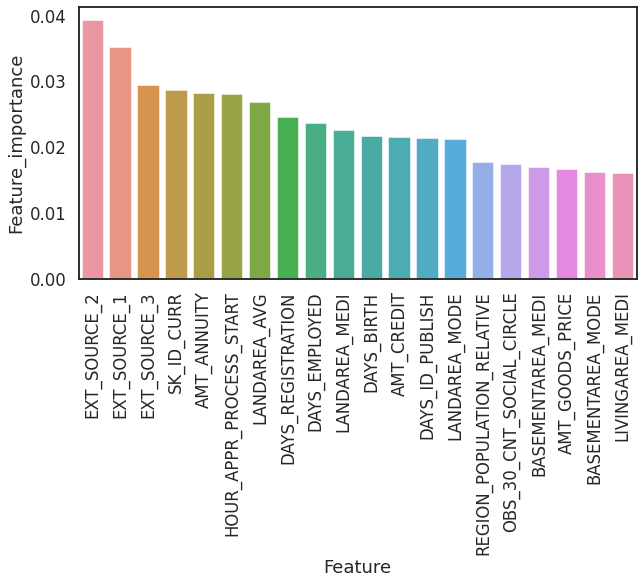

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.set_theme(style="white", context="talk")
sns.barplot(data=features_df.iloc[:20,:],x="Feature",y="Feature_importance")

In [ ]:
bureau_df = pd.read_csv("/content/bureau.csv")
bureau_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497145 entries, 0 to 497144
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              497145 non-null  int64  
 1   SK_ID_BUREAU            497145 non-null  int64  
 2   CREDIT_ACTIVE           497145 non-null  object 
 3   CREDIT_CURRENCY         497145 non-null  object 
 4   DAYS_CREDIT             497144 non-null  float64
 5   CREDIT_DAY_OVERDUE      497144 non-null  float64
 6   DAYS_CREDIT_ENDDATE     466337 non-null  float64
 7   DAYS_ENDDATE_FACT       313758 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  168301 non-null  float64
 9   CNT_CREDIT_PROLONG      497144 non-null  float64
 10  AMT_CREDIT_SUM          497142 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     422297 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    323843 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  497144 non-null  float64
 14  CREDIT_TYPE         

In [ ]:
missing_df = application_df.isnull().sum()/len(application_df)
type(missing_df)

pandas.core.series.Series

In [ ]:
import numpy as np
(application_df.isnull().sum() > 0).astype(np.int64).sum()

85

In [ ]:
bureau_df.isnull().sum()/len(bureau_df)

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000002
CREDIT_DAY_OVERDUE        0.000002
DAYS_CREDIT_ENDDATE       0.061970
DAYS_ENDDATE_FACT         0.368880
AMT_CREDIT_MAX_OVERDUE    0.661465
CNT_CREDIT_PROLONG        0.000002
AMT_CREDIT_SUM            0.000006
AMT_CREDIT_SUM_DEBT       0.150556
AMT_CREDIT_SUM_LIMIT      0.348594
AMT_CREDIT_SUM_OVERDUE    0.000002
CREDIT_TYPE               0.000002
DAYS_CREDIT_UPDATE        0.000002
AMT_ANNUITY               0.687650
dtype: float64

In [ ]:
application_df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [ ]:
feature_list_1

4                    AMT_ANNUITY
21       HOUR_APPR_PROCESS_START
40                  LANDAREA_AVG
9              DAYS_REGISTRATION
8                  DAYS_EMPLOYED
68                 LANDAREA_MEDI
7                     DAYS_BIRTH
3                     AMT_CREDIT
10               DAYS_ID_PUBLISH
54                 LANDAREA_MODE
6     REGION_POPULATION_RELATIVE
74      OBS_30_CNT_SOCIAL_CIRCLE
60             BASEMENTAREA_MEDI
5                AMT_GOODS_PRICE
46             BASEMENTAREA_MODE
70               LIVINGAREA_MEDI
Name: Feature, dtype: object

In [100]:
#feature_list_1
from sklearn.metrics import recall_score
# X_test,y_test = application_df_test[feature_list_1],application_df_test["TARGET"]
X_train = dt_new[feature_list_2]
y_train = dt_new["TARGET"]
y_test = 
estimator = RandomForestClassifier(random_state=0)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print(recall_score(y_true, y_pred, average='macro'))
print(estimator.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AMT_ANNUITY
- AMT_CREDIT
- AMT_GOODS_PRICE
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_HOUR
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored